<a href="https://colab.research.google.com/github/ShashankAlagawadi/PredictiveMaintenance/blob/main/Algorithms_3K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.8466666666666667
              precision    recall  f1-score   support

           1       0.78      0.80      0.79       212
           2       0.86      0.86      0.86       174
           3       0.91      0.88      0.90       214

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



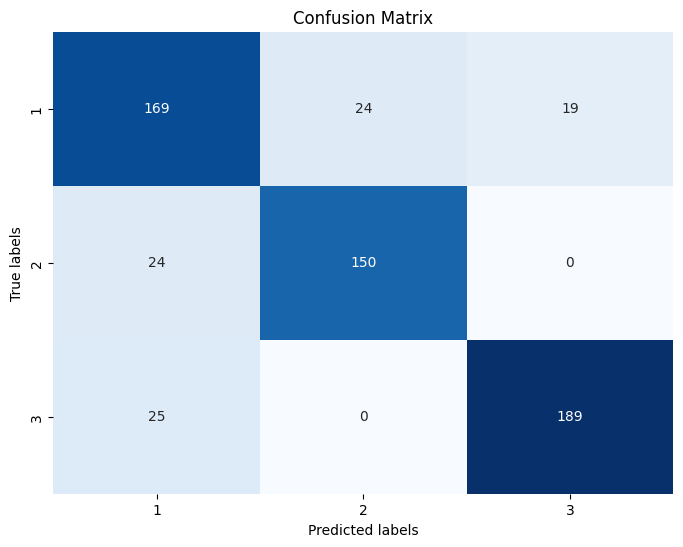

Number of Trees: 1 | Accuracy: 0.8133333333333334
Number of Trees: 2 | Accuracy: 0.8166666666666667
Number of Trees: 3 | Accuracy: 0.8216666666666667
Number of Trees: 4 | Accuracy: 0.82
Number of Trees: 5 | Accuracy: 0.8266666666666667
Number of Trees: 6 | Accuracy: 0.835
Number of Trees: 7 | Accuracy: 0.8316666666666667
Number of Trees: 8 | Accuracy: 0.8366666666666667
Number of Trees: 9 | Accuracy: 0.835
Number of Trees: 10 | Accuracy: 0.8383333333333334
Number of Trees: 11 | Accuracy: 0.8316666666666667
Number of Trees: 12 | Accuracy: 0.84
Number of Trees: 13 | Accuracy: 0.84
Number of Trees: 14 | Accuracy: 0.8416666666666667
Number of Trees: 15 | Accuracy: 0.8466666666666667
Number of Trees: 16 | Accuracy: 0.8466666666666667
Number of Trees: 17 | Accuracy: 0.845
Number of Trees: 18 | Accuracy: 0.8483333333333334
Number of Trees: 19 | Accuracy: 0.8483333333333334
Number of Trees: 20 | Accuracy: 0.8466666666666667
Number of Trees: 21 | Accuracy: 0.8483333333333334
Number of Trees: 22

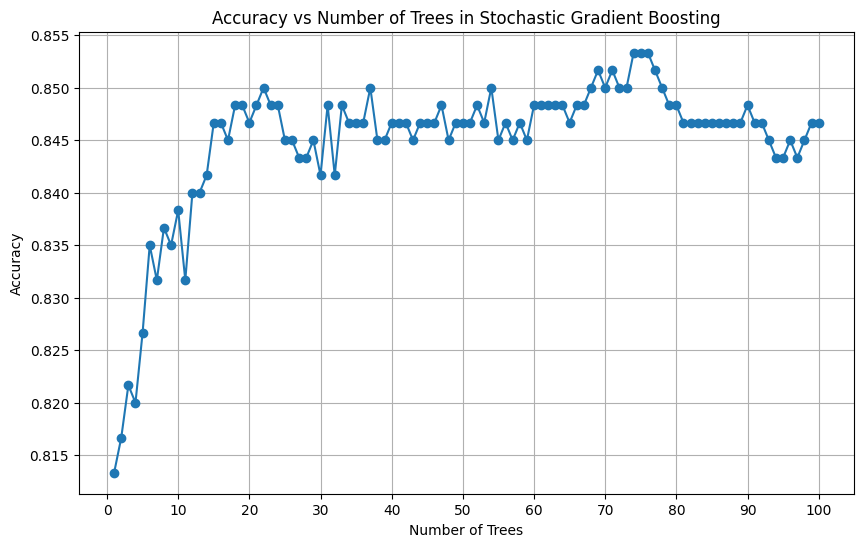

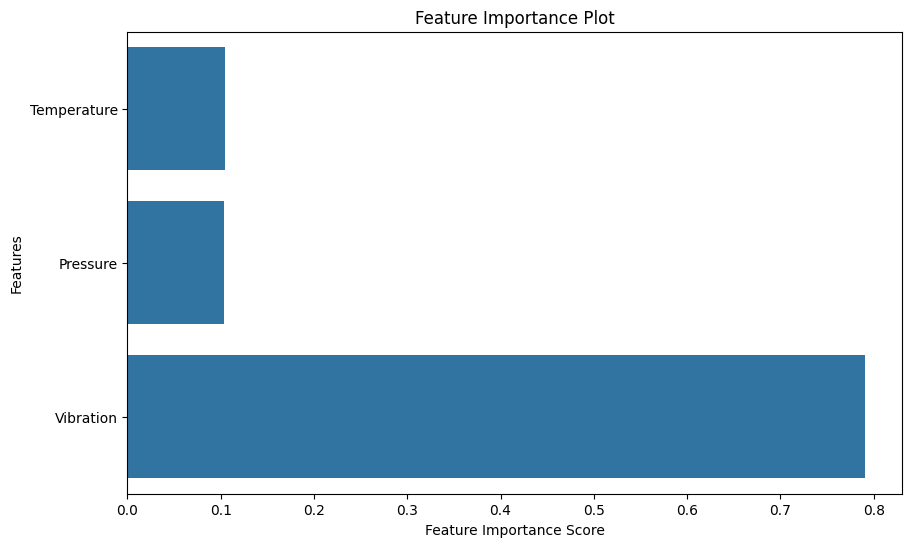

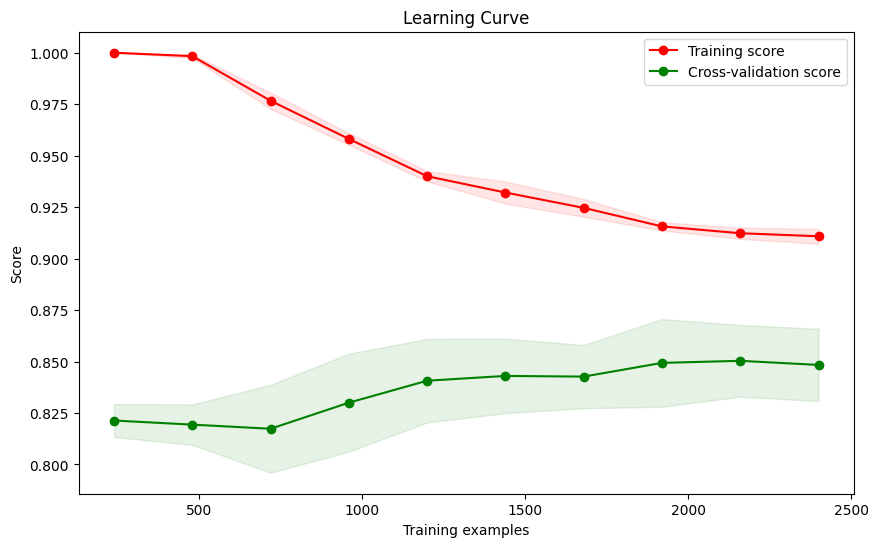

In [ ]:
# Stochastic Gradient Boosting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve

# Load the dataset
df = pd.read_csv('/content/PDM3K.csv')
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize GradientBoostingClassifier
sgb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model
sgb_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = sgb_classifier.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(class_report)

# Heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Accuracy vs Loss curve (accuracy vs number of trees)
num_trees_range = range(1, 101)
accuracies = []

for num_trees in num_trees_range:
    sgb_classifier = GradientBoostingClassifier(n_estimators=num_trees, random_state=42)
    sgb_classifier.fit(X_train, y_train)
    y_pred = sgb_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print("Number of Trees:", num_trees, "| Accuracy:", accuracy)

plt.figure(figsize=(10, 6))
plt.plot(num_trees_range, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs Number of Trees in Stochastic Gradient Boosting')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 101, step=10))
plt.grid(True)
plt.show()

# Feature Importance
feature_importances = sgb_classifier.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    sgb_classifier, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(10, 6))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()



In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.0 MB/s eta 0:00:00


Learning rate set to 0.5
0:	learn: 0.6694528	total: 3.86ms	remaining: 382ms
1:	learn: 0.5203301	total: 7.27ms	remaining: 356ms
2:	learn: 0.4465548	total: 10.8ms	remaining: 350ms
3:	learn: 0.4032279	total: 14.5ms	remaining: 347ms
4:	learn: 0.3771617	total: 18.5ms	remaining: 352ms
5:	learn: 0.3561639	total: 22ms	remaining: 344ms
6:	learn: 0.3448701	total: 25.3ms	remaining: 336ms
7:	learn: 0.3352580	total: 29.5ms	remaining: 339ms
8:	learn: 0.3308606	total: 34.1ms	remaining: 345ms
9:	learn: 0.3269282	total: 39ms	remaining: 351ms
10:	learn: 0.3222563	total: 43.7ms	remaining: 354ms
11:	learn: 0.3180433	total: 47.5ms	remaining: 348ms
12:	learn: 0.3154492	total: 51.2ms	remaining: 343ms
13:	learn: 0.3130384	total: 55.1ms	remaining: 338ms
14:	learn: 0.3113315	total: 59ms	remaining: 334ms
15:	learn: 0.3082097	total: 62.4ms	remaining: 327ms
16:	learn: 0.3036277	total: 65.7ms	remaining: 321ms
17:	learn: 0.2997643	total: 69ms	remaining: 314ms
18:	learn: 0.2981691	total: 72.4ms	remaining: 309ms
19:	l

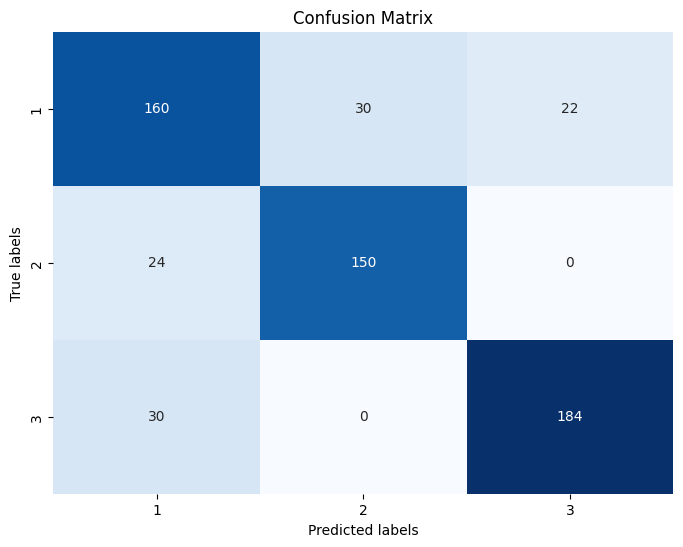

Streaming output truncated to the last 5000 lines.
Learning rate set to 0.5
0:	learn: 0.6694528	total: 3.35ms	remaining: 67.1ms
1:	learn: 0.5203301	total: 6.77ms	remaining: 64.3ms
2:	learn: 0.4465548	total: 10.1ms	remaining: 60.7ms
3:	learn: 0.4032279	total: 13.4ms	remaining: 56.9ms
4:	learn: 0.3771617	total: 16.5ms	remaining: 52.9ms
5:	learn: 0.3561639	total: 19.8ms	remaining: 49.4ms
6:	learn: 0.3448701	total: 23ms	remaining: 46ms
7:	learn: 0.3352580	total: 26.1ms	remaining: 42.3ms
8:	learn: 0.3308606	total: 29.1ms	remaining: 38.8ms
9:	learn: 0.3269282	total: 32.3ms	remaining: 35.6ms
10:	learn: 0.3222563	total: 35.7ms	remaining: 32.4ms
11:	learn: 0.3180433	total: 39.1ms	remaining: 29.3ms
12:	learn: 0.3154492	total: 42.7ms	remaining: 26.3ms
13:	learn: 0.3130384	total: 45.9ms	remaining: 23ms
14:	learn: 0.3113315	total: 49.3ms	remaining: 19.7ms
15:	learn: 0.3082097	total: 52.6ms	remaining: 16.4ms
16:	learn: 0.3036277	total: 55.9ms	remaining: 13.2ms
17:	learn: 0.2997643	total: 59.1ms	rema

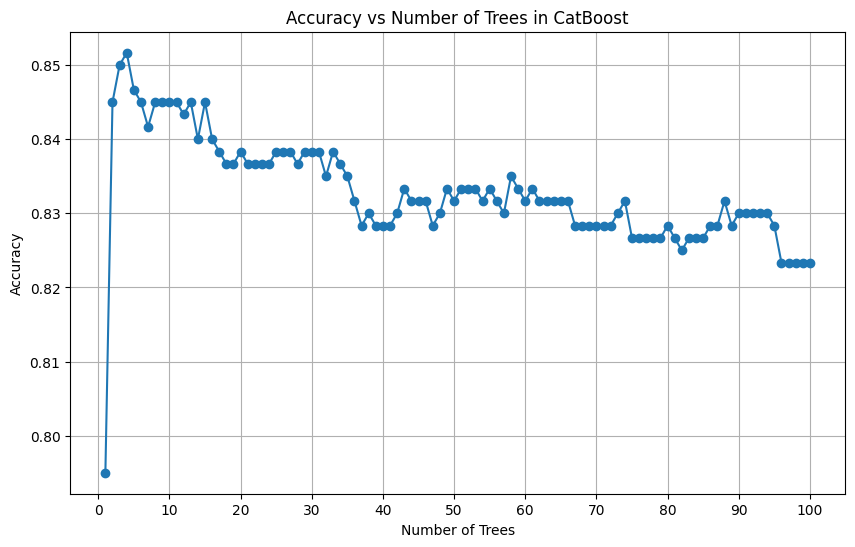

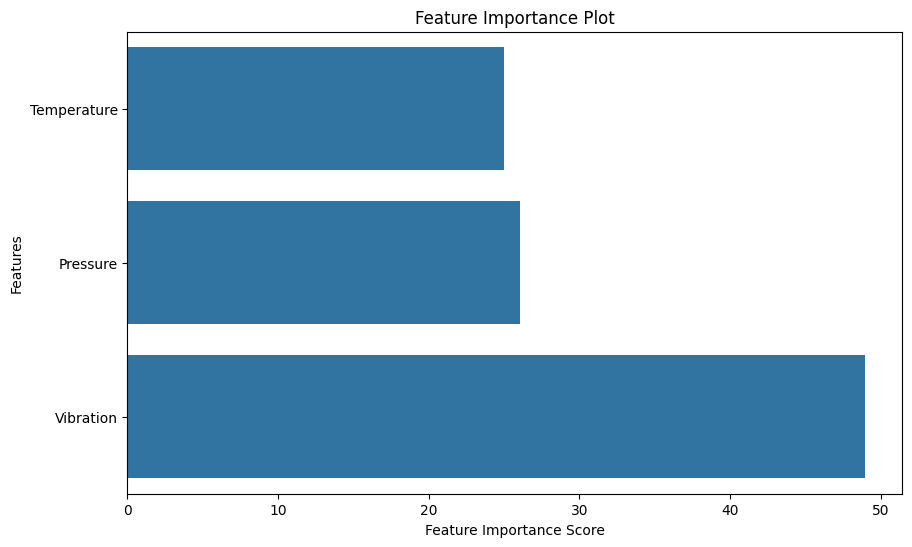

Streaming output truncated to the last 5000 lines.
49:	learn: 0.0948557	total: 130ms	remaining: 130ms
50:	learn: 0.0929813	total: 133ms	remaining: 128ms
51:	learn: 0.0903504	total: 136ms	remaining: 125ms
52:	learn: 0.0886642	total: 138ms	remaining: 122ms
53:	learn: 0.0869764	total: 140ms	remaining: 120ms
54:	learn: 0.0848653	total: 143ms	remaining: 117ms
55:	learn: 0.0831214	total: 146ms	remaining: 114ms
56:	learn: 0.0805535	total: 149ms	remaining: 112ms
57:	learn: 0.0796205	total: 151ms	remaining: 109ms
58:	learn: 0.0787007	total: 153ms	remaining: 107ms
59:	learn: 0.0773015	total: 156ms	remaining: 104ms
60:	learn: 0.0756568	total: 158ms	remaining: 101ms
61:	learn: 0.0744064	total: 161ms	remaining: 98.5ms
62:	learn: 0.0736629	total: 163ms	remaining: 95.9ms
63:	learn: 0.0727792	total: 166ms	remaining: 93.2ms
64:	learn: 0.0717418	total: 169ms	remaining: 90.7ms
65:	learn: 0.0704509	total: 172ms	remaining: 88.8ms
66:	learn: 0.0695403	total: 177ms	remaining: 87.1ms
67:	learn: 0.0685118	tota

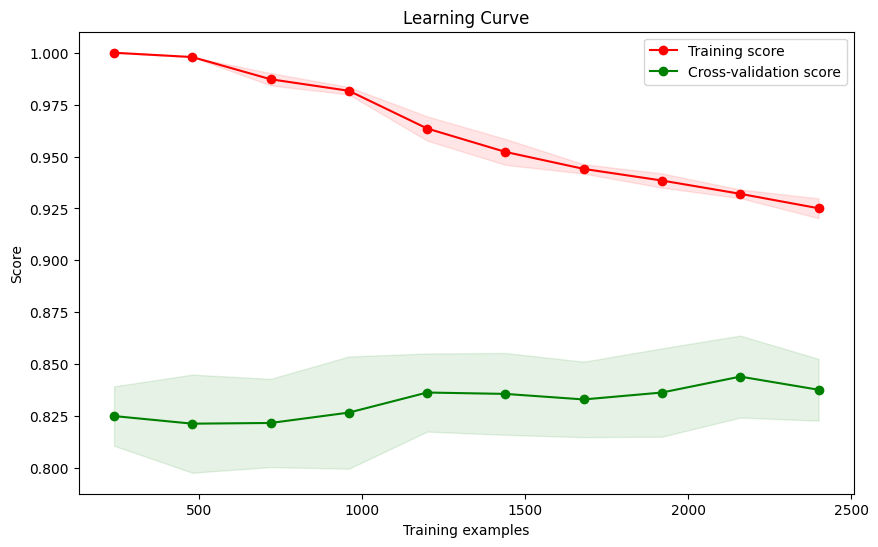

In [ ]:
#Catboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve

# Load the dataset
df = pd.read_csv('/content/PDM3K.csv')
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoostClassifier
catboost_classifier = CatBoostClassifier(n_estimators=100, random_state=42)
catboost_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = catboost_classifier.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print F1 score and recall
print(class_report)

# Heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Accuracy vs Loss curve (accuracy vs number of trees)
num_trees_range = range(1, 101)
accuracies = []

for num_trees in num_trees_range:
    catboost_classifier = CatBoostClassifier(n_estimators=num_trees, random_state=42)
    catboost_classifier.fit(X_train, y_train)
    y_pred = catboost_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print("Number of Trees:", num_trees, "| Accuracy:", accuracy)

plt.figure(figsize=(10, 6))
plt.plot(num_trees_range, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs Number of Trees in CatBoost')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 101, step=10))
plt.grid(True)
plt.show()

feature_importances = catboost_classifier.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    catboost_classifier, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(10, 6))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           1       0.76      0.77      0.77       212
           2       0.84      0.86      0.85       174
           3       0.90      0.88      0.89       214

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600



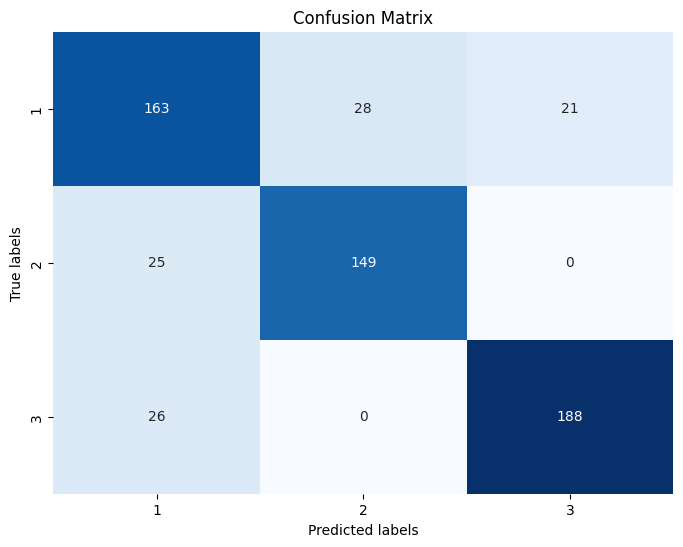

Number of Trees: 1 | Accuracy: 0.7566666666666667
Number of Trees: 2 | Accuracy: 0.7533333333333333
Number of Trees: 3 | Accuracy: 0.8133333333333334
Number of Trees: 4 | Accuracy: 0.8083333333333333
Number of Trees: 5 | Accuracy: 0.8366666666666667
Number of Trees: 6 | Accuracy: 0.8216666666666667
Number of Trees: 7 | Accuracy: 0.8266666666666667
Number of Trees: 8 | Accuracy: 0.8266666666666667
Number of Trees: 9 | Accuracy: 0.8216666666666667
Number of Trees: 10 | Accuracy: 0.8233333333333334
Number of Trees: 11 | Accuracy: 0.8283333333333334
Number of Trees: 12 | Accuracy: 0.8266666666666667
Number of Trees: 13 | Accuracy: 0.8233333333333334
Number of Trees: 14 | Accuracy: 0.83
Number of Trees: 15 | Accuracy: 0.835
Number of Trees: 16 | Accuracy: 0.835
Number of Trees: 17 | Accuracy: 0.835
Number of Trees: 18 | Accuracy: 0.8316666666666667
Number of Trees: 19 | Accuracy: 0.8333333333333334
Number of Trees: 20 | Accuracy: 0.83
Number of Trees: 21 | Accuracy: 0.83
Number of Trees: 22

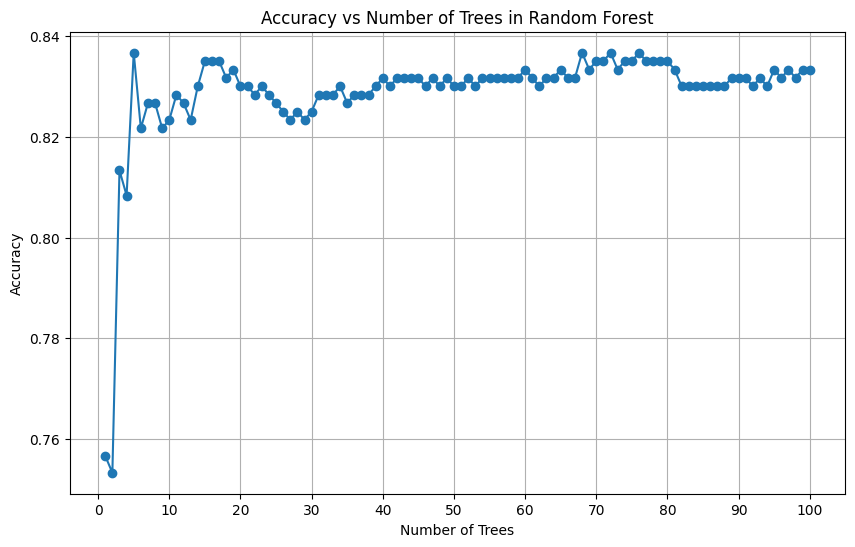

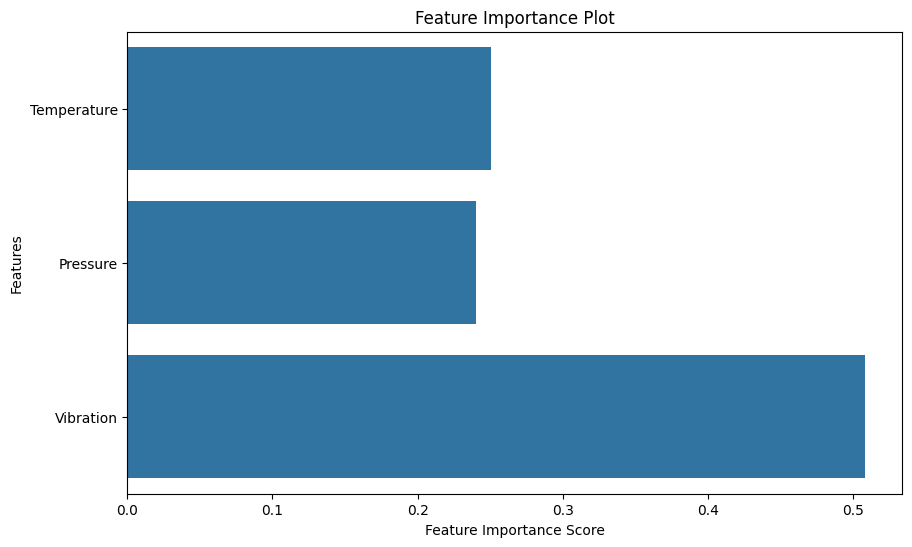

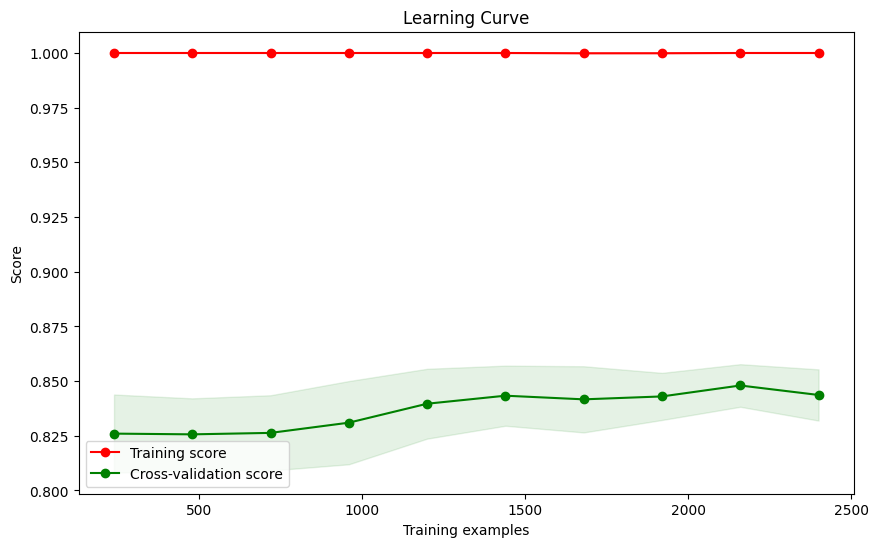

In [ ]:
#Binary class
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv('/content/PDM3K.csv')
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print F1 score and recall
print(class_report)

# Heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

num_trees_range = range(1, 101)
accuracies = []

for num_trees in num_trees_range:
    rf_classifier = RandomForestClassifier(n_estimators=num_trees, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print("Number of Trees:", num_trees, "| Accuracy:", accuracy)

plt.figure(figsize=(10, 6))
plt.plot(num_trees_range, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs Number of Trees in Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 101, step=10))
plt.grid(True)
plt.show()

feature_importances = rf_classifier.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf_classifier, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(10, 6))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


